### Get all train ratings and look for discernable patterns 

In [33]:
import pandas as pd
import numpy as np
import os
import pickle
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
os.chdir(r"F:\ScoreData\Zee TV")
pd.options.display.max_columns=None
from plotly  import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot,plot
import plotly.plotly as py
import plotly.graph_objs as go
print("Plotly version ",__version__)
init_notebook_mode(connected=True)
%matplotlib inline

Plotly version  3.4.2


In [34]:
with open('read_files','rb') as rf:
    shows=pickle.load(rf)

In [35]:
train_ratings=pd.read_csv("train_showname_ratings_max_rmBlanks.csv")

In [36]:
shows.head(2)

,Source,Host,Link,LocalTime,Authority,Gender,Country,Location,Sentiment,Alexa Rank,Alexa Reach,Title,Snippet,Content,Unique ID,Language,Followers,Following,Summary,showname,nname
0,TWITTER,http://twitter.com/ASHWANI11345063/,http://twitter.com/ASHWANI11345063/statuses/10...,2018-10-25 23:29:56,0,Male,NaN,NaN,None,0,0,@ASHWANI11345063,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,23723083,TL,1,8,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions
1,INSTAGRAM,http://instagram.com/dabh_big_fan_bulgaria,https://www.instagram.com/p/BpXjXNVC03A/,2018-10-25 15:34:56,0,NaN,BG,Sofia;-42;-Bulgaria,Positive,0,0,dabh_big_fan_bulgaria,"Ayush Anand in ,,Perfect Pati"" 25/10/18 Episod...","Ayush Anand in ,,Perfect Pati"" 25/10/18 Episod...",23709925,EN,0,0,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions


In [37]:
train_ratings.head(2)

,Showname,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45
0,BIGGBOSS-Mentions,1.98,2.03,1.92,2.3,2.02,1.86,1.87,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DILHITOHAI-Mentions,0.33,0.29,0.32,0.3,0.34,0.33,0.35,0.32,0.31,0.32,0.34,0.65,0.71,0.54,0.63,0.6,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
official_handle=["http://twitter.com/AndTVOfficial/","http://twitter.com/ColorsTV/","http://twitter.com/SonySABTV/","http://twitter.com/SonyTV/","http://twitter.com/StarPlus/","http://twitter.com/ZeeTV/"]
twitter=shows[(shows.Source=='TWITTER')& ~(shows.Host.isin(official_handle))].copy()
twitter.reset_index(drop=True,inplace=True)
twitter['original']=~twitter.Content.str.startswith(("RT","QT"))
twitter['clean_content']=twitter.Content.str.replace(r"http.*[\s\n]","")

In [39]:
twitter.head(2)

,Source,Host,Link,LocalTime,Authority,Gender,Country,Location,Sentiment,Alexa Rank,Alexa Reach,Title,Snippet,Content,Unique ID,Language,Followers,Following,Summary,showname,nname,original,clean_content
0,TWITTER,http://twitter.com/ASHWANI11345063/,http://twitter.com/ASHWANI11345063/statuses/10...,2018-10-25 23:29:56,0,Male,NaN,NaN,None,0,0,@ASHWANI11345063,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,23723083,TL,1,8,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,True,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...
1,TWITTER,http://twitter.com/P_Madhumita/,http://twitter.com/P_Madhumita/statuses/105540...,2018-10-25 06:22:06,5,Male,NaN,NaN,None,0,0,@P_Madhumita,"RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...","RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...",23665380,ID,264,82,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,False,"RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram..."


In [40]:
dt_min=twitter.groupby('nname')['LocalTime'].min().to_frame().reset_index()
dt_min['0_7_date']=dt_min['LocalTime'].apply(lambda x: x + dt.timedelta(days=7))
dt_min['7_14_date']=dt_min['LocalTime'].apply(lambda x: x + dt.timedelta(days=14))
dt_min['14_21_date']=dt_min['LocalTime'].apply(lambda x: x + dt.timedelta(days=21))
dt_min['max_dt']=dt_min['LocalTime'].apply(lambda x: x + dt.timedelta(days=30))

In [41]:
dt_min

,nname,LocalTime,0_7_date,7_14_date,14_21_date,max_dt
0,BIGGBOSS-Mentions,2018-09-08 00:00:09,2018-09-15 00:00:09,2018-09-22 00:00:09,2018-09-29 00:00:09,2018-10-08 00:00:09
1,DILHITOHAI-Mentions,2018-06-09 02:02:43,2018-06-16 02:02:43,2018-06-23 02:02:43,2018-06-30 02:02:43,2018-07-09 02:02:43
2,HARSHAAKHPEULLUBAITHAAHAI-Mentions,2018-02-17 01:16:20,2018-02-24 01:16:20,2018-03-03 01:16:20,2018-03-10 01:16:20,2018-03-19 01:16:20
3,JIJAJICHHATPARHAIN-Mentions,2018-01-07 03:30:05,2018-01-14 03:30:05,2018-01-21 03:30:05,2018-01-28 03:30:05,2018-02-06 03:30:05
4,KHICHDI-Mentions,2018-04-07 00:03:29,2018-04-14 00:03:29,2018-04-21 00:03:29,2018-04-28 00:03:29,2018-05-07 00:03:29
5,KRISHNACHALILONDON-Mentions,2018-05-12 00:03:13,2018-05-19 00:03:13,2018-05-26 00:03:13,2018-06-02 00:03:13,2018-06-11 00:03:13
6,NAZAR-Mentions,2018-07-21 04:45:36,2018-07-28 04:45:36,2018-08-04 04:45:36,2018-08-11 04:45:36,2018-08-20 04:45:36
7,andtv-show-perfect-pati-Mentions,2018-08-25 03:29:36,2018-09-01 03:29:36,2018-09-08 03:29:36,2018-09-15 03:29:36,2018-09-24 03:29:36
8,andtvofficial-show-bitti-businesswali-Mentions,2018-05-06 09:57:34,2018-05-13 09:57:34,2018-05-20 09:57:34,2018-05-27 09:57:34,2018-06-05 09:57:34
9,andtvofficial-show-high-fever-Mentions,2018-03-11 00:23:24,2018-03-18 00:23:24,2018-03-25 00:23:24,2018-04-01 00:23:24,2018-04-10 00:23:24


In [42]:
twitter2=twitter.merge(dt_min[['nname','max_dt']],on='nname',how='left')
twitter2=twitter2[twitter2.LocalTime<=twitter2.max_dt].copy()
twitter2.groupby('nname')['LocalTime'].apply(lambda x:max(x)-min(x))

nname
BIGGBOSS-Mentions                                          30 days 00:00:00
DILHITOHAI-Mentions                                        29 days 23:34:05
HARSHAAKHPEULLUBAITHAAHAI-Mentions                         29 days 22:47:28
JIJAJICHHATPARHAIN-Mentions                                29 days 23:59:44
KHICHDI-Mentions                                           29 days 17:11:18
KRISHNACHALILONDON-Mentions                                29 days 22:14:03
NAZAR-Mentions                                             29 days 19:23:44
andtv-show-perfect-pati-Mentions                           29 days 06:00:36
andtvofficial-show-bitti-businesswali-Mentions             29 days 23:26:25
andtvofficial-show-high-fever-Mentions                     29 days 20:46:04
andtvofficial-show-laal-ishq-Mentions                      21 days 11:17:52
andtvofficial-show-love-me-india-Mentions                  29 days 23:50:25
andtvofficial-show-mitegi-lakshmanrekha-Mentions           29 days 22:16:21
andtvo

In [43]:
twitter_ncnt=twitter2[twitter2.original].groupby('nname')['Unique ID'].nunique().to_frame()

In [44]:
twitter_ncnt.head(3)

,Unique ID
nname,
BIGGBOSS-Mentions,18799
DILHITOHAI-Mentions,986
HARSHAAKHPEULLUBAITHAAHAI-Mentions,6570


In [45]:
nrows=train_ratings.shape[0]
brkup=(20,50,30)
first=round(nrows*brkup[0]/100.0)
second=round(nrows*brkup[1]/100.0)
thresholds=[0,first,first+second]
def avg_ratings(train):
    avg_train=pd.DataFrame()
    avg_train['first']=train.iloc[:,1:2].mean(skipna=True,axis=1)
    avg_train['first2']=train.iloc[:,1:3].mean(skipna=True,axis=1)
    avg_train['first3']=train.iloc[:,1:4].mean(skipna=True,axis=1)
    avg_train['first4']=train.iloc[:,1:5].mean(skipna=True,axis=1)
    avg_train['next_2_5']=train.iloc[:,2:6].mean(skipna=True,axis=1)
    avg_train['next_2_7']=train.iloc[:,2:8].mean(skipna=True,axis=1)
    avg_train['next_3_6']=train.iloc[:,3:7].mean(skipna=True,axis=1)
    avg_train['next_3_8']=train.iloc[:,5:9].mean(skipna=True,axis=1)
    avg_train['next_4_7']=train.iloc[:,4:8].mean(skipna=True,axis=1)
    avg_train['next_4_9']=train.iloc[:,4:10].mean(skipna=True,axis=1)
    avg_train['next_5_8']=train.iloc[:,5:9].mean(skipna=True,axis=1)
    avg_train['next_5_10']=train.iloc[:,5:11].mean(skipna=True,axis=1)
    avg_train['first4_ex1']=train.iloc[:,2:5].mean(skipna=True,axis=1)
    avg_train.index=train.Showname
    return avg_train

def cal_threshold(series):
    cutoff={}
    cutoff['first_cutoff']=np.min(series.values[:first])
    cutoff['second_cutoff']=np.min(series.values[first:first+second])
    return cutoff

def create_rank(series,cutoff):
    temp=series.copy()
    temp[:]=1
    temp[(series>=cutoff['second_cutoff']) & (series<cutoff['first_cutoff']) ]=2
    temp[series>=cutoff['first_cutoff']]=1
    temp[series<cutoff['second_cutoff']]=3
    return temp
    

def cal_err(train,srt="first4"):
    train_ranked=avg_ratings(train.copy())
    train_ranked.sort_values(srt,ascending=False,inplace=True)
    cutoff=cal_threshold(train_ranked[srt])
    print(cutoff)
    train_ranked2=train_ranked.apply(lambda series:create_rank(series,cutoff),axis='columns')
#     print("--------------------------------")
#     print("\n")
#     print(pd.crosstab(index=train[srt],columns=train.next4))
#     print("--------------------------------")
#     print("\n")
#     print(pd.crosstab(index=train[srt],columns=train.next6))
    return train_ranked,train_ranked2
#     return train_ranked

In [46]:
trn,trn_ranked=cal_err(train_ratings.copy(),srt='first')

{'first_cutoff': 2.15, 'second_cutoff': 0.64}


In [47]:
trn.head(3)

,first,first2,first3,first4,next_2_5,next_2_7,next_3_6,next_3_8,next_4_7,next_4_9,next_5_8,next_5_10,first4_ex1
Showname,,,,,,,,,,,,,
colors-tv-show-naagin-Mentions,4.35,4.065,4.006667,3.9825,3.8925,3.858333,3.8800,3.920,3.8700,3.963333,3.920,3.935000,3.860000
colors-tv---show--dance-deewane-Mentions,3.05,2.790,2.700000,2.7150,2.6375,2.578333,2.6125,2.615,2.6050,2.703333,2.615,2.723333,2.603333
colorstv-show-bepannaah-Mentions,2.37,2.160,1.970000,1.8550,1.6000,1.508333,1.4300,1.335,1.3775,1.351667,1.335,1.363333,1.683333


In [48]:
trn_ranked.head(3)

,first,first2,first3,first4,next_2_5,next_2_7,next_3_6,next_3_8,next_4_7,next_4_9,next_5_8,next_5_10,first4_ex1
Showname,,,,,,,,,,,,,
colors-tv-show-naagin-Mentions,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
colors-tv---show--dance-deewane-Mentions,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
colorstv-show-bepannaah-Mentions,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [49]:
print(pd.crosstab(trn_ranked['first'],trn_ranked.next_2_5))
print("\n")
print(pd.crosstab(trn_ranked['first'],trn_ranked.next_2_7))

next_2_5  1.0  2.0  3.0
first                  
1.0         3    5    0
2.0         0   17    3
3.0         0    0   12


next_2_7  1.0  2.0  3.0
first                  
1.0         3    5    0
2.0         0   17    3
3.0         0    0   12


In [50]:
print(pd.crosstab(trn_ranked.first2,trn_ranked.next_3_6))
print("\n")
print(pd.crosstab(trn_ranked.first2,trn_ranked.next_3_8))

next_3_6  1.0  2.0  3.0
first2                 
1.0         3    1    0
2.0         0   21    1
3.0         0    0   14


next_3_8  1.0  2.0  3.0
first2                 
1.0         3    1    0
2.0         2   19    1
3.0         1    1   12


In [51]:
pd.crosstab(trn_ranked.first2,trn_ranked.next_2_7)

next_2_7,1.0,2.0,3.0
first2,,,
1.0,3,1,0
2.0,0,21,1
3.0,0,0,14


In [52]:
trn_avg=train_ratings[['Showname','W1','W2','W3']].copy().set_index('Showname').mean(axis='columns').to_frame()
trn_avg.columns=['initial_avg_rating']
trn_avg.head(2)


,initial_avg_rating
Showname,
BIGGBOSS-Mentions,1.976667
DILHITOHAI-Mentions,0.313333


In [53]:
show_rtng_cnt=twitter_ncnt.merge(trn_avg,how='inner',left_index=True,right_index=True)

In [54]:
show_rtng_cnt.head()

,Unique ID,initial_avg_rating
BIGGBOSS-Mentions,18799,1.976667
DILHITOHAI-Mentions,986,0.313333
HARSHAAKHPEULLUBAITHAAHAI-Mentions,6570,0.953333
JIJAJICHHATPARHAIN-Mentions,275,0.913333
andtv-show-perfect-pati-Mentions,78,0.243333


In [55]:
trace0=go.Scatter(
    x=show_rtng_cnt['Unique ID'],
    y=show_rtng_cnt.initial_avg_rating,
    mode='markers',
    name='train',
    text=show_rtng_cnt.index
#     marker=dict(color='rbga(255, 128, 255, 0.8)')
    )
data=[trace0]
layout=go.Layout(title="Ratings vs Unique count of Tweets",xaxis={'title':'Unique Count of Tweets'},yaxis={'title':'First three average ratings'})
fig=dict(data=data,layout=layout)
iplot(fig)

In [56]:
rating_measure='first'

show_rtng_cnt=twitter_ncnt.merge(trn[[rating_measure]],how='inner',left_index=True,right_index=True)

trace0=go.Scatter(
    x=show_rtng_cnt['Unique ID'],
    y=show_rtng_cnt[rating_measure],
    mode='markers',
    name='train',
    text=show_rtng_cnt.index
#     marker=dict(color='rbga(255, 128, 255, 0.8)')
    )
data=[trace0]
layout=go.Layout(title="Ratings vs Unique count of Tweets",xaxis={'title':'Unique Count of Tweets'},yaxis={'title':'{} rating'.format(rating_measure)})
fig=dict(data=data,layout=layout)
iplot(fig)

#### Weekly count of tweets compared to weekly ratings

In [57]:
twitter3=twitter.merge(dt_min.drop('LocalTime',axis='columns'),on='nname',how='left')
twitter3.head(2)

,Source,Host,Link,LocalTime,Authority,Gender,Country,Location,Sentiment,Alexa Rank,Alexa Reach,Title,Snippet,Content,Unique ID,Language,Followers,Following,Summary,showname,nname,original,clean_content,0_7_date,7_14_date,14_21_date,max_dt
0,TWITTER,http://twitter.com/ASHWANI11345063/,http://twitter.com/ASHWANI11345063/statuses/10...,2018-10-25 23:29:56,0,Male,NaN,NaN,None,0,0,@ASHWANI11345063,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,23723083,TL,1,8,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,True,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,2018-09-01 03:29:36,2018-09-08 03:29:36,2018-09-15 03:29:36,2018-09-24 03:29:36
1,TWITTER,http://twitter.com/P_Madhumita/,http://twitter.com/P_Madhumita/statuses/105540...,2018-10-25 06:22:06,5,Male,NaN,NaN,None,0,0,@P_Madhumita,"RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...","RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...",23665380,ID,264,82,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,False,"RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...",2018-09-01 03:29:36,2018-09-08 03:29:36,2018-09-15 03:29:36,2018-09-24 03:29:36


In [58]:
def create_periods(series):
    period=0
    if series['LocalTime']<=series['0_7_date']:
        period=1
    elif series['LocalTime']<=series['7_14_date']:
        period=2
    elif series['LocalTime']<=series['14_21_date']:
        period=3
    else:
        period=4
    return period

In [59]:
twitter3=twitter3[(twitter3.LocalTime<=twitter3.max_dt) & (twitter3.original)].copy()
twitter3['period']=twitter3.apply(create_periods,axis='columns')
twitter3.head(2)

,Source,Host,Link,LocalTime,Authority,Gender,Country,Location,Sentiment,Alexa Rank,Alexa Reach,Title,Snippet,Content,Unique ID,Language,Followers,Following,Summary,showname,nname,original,clean_content,0_7_date,7_14_date,14_21_date,max_dt,period
139,TWITTER,http://twitter.com/MarathiSanmaan/,http://twitter.com/MarathiSanmaan/statuses/104...,2018-09-23 09:30:12,7,NaN,XX,NaN,Positive,0,0,@MarathiSanmaan,#PerfectPati &TV #Serial Launch: Sayali Sanjee...,#PerfectPati &TV #Serial Launch: Sayali Sanjee...,20649591,ID,3397,402,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,True,#PerfectPati &TV #Serial Launch: Sayali Sanjee...,2018-09-01 03:29:36,2018-09-08 03:29:36,2018-09-15 03:29:36,2018-09-24 03:29:36,4
140,TWITTER,http://twitter.com/MarathiSanmaan/,http://twitter.com/MarathiSanmaan/statuses/104...,2018-09-23 02:55:14,7,NaN,XX,NaN,Positive,0,0,@MarathiSanmaan,#PerfectPati &TV #Serial Launch: #SayaliSanjee...,#PerfectPati &TV #Serial Launch: #SayaliSanjee...,20623746,EN,3397,402,NaN,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,True,#PerfectPati &TV #Serial Launch: #SayaliSanjee...,2018-09-01 03:29:36,2018-09-08 03:29:36,2018-09-15 03:29:36,2018-09-24 03:29:36,4


In [78]:
twitter_period=twitter3.groupby(['nname','period'])['Unique ID'].nunique().reset_index(drop=False)
twitter_period.rename(columns={'Unique ID':'tweet_counts'},inplace=True)

In [79]:
trn_3_ratings=train_ratings.iloc[:,:4].copy()
trn_3_ratings.head()

,Showname,W1,W2,W3
0,BIGGBOSS-Mentions,1.98,2.03,1.92
1,DILHITOHAI-Mentions,0.33,0.29,0.32
2,HARSHAAKHPEULLUBAITHAAHAI-Mentions,1.12,0.86,0.88
3,JIJAJICHHATPARHAIN-Mentions,0.99,0.87,0.88
4,andtv-show-perfect-pati-Mentions,0.29,0.24,0.20


In [80]:
ratings_melt=pd.melt(trn_3_ratings,id_vars='Showname',var_name='period',value_name="ratings")
ratings_melt['period']=ratings_melt.period.map({'W1':2,'W2':3,'W3':4})
ratings_melt.rename(columns={'Showname':'nname'},inplace=True)
ratings_melt.head()

,nname,period,ratings
0,BIGGBOSS-Mentions,2,1.98
1,DILHITOHAI-Mentions,2,0.33
2,HARSHAAKHPEULLUBAITHAAHAI-Mentions,2,1.12
3,JIJAJICHHATPARHAIN-Mentions,2,0.99
4,andtv-show-perfect-pati-Mentions,2,0.29


In [81]:
per_week=twitter_period.merge(ratings_melt,on=['nname','period'],how='left')
per_week.head()

,nname,period,tweet_counts,ratings
0,BIGGBOSS-Mentions,1,708,NaN
1,BIGGBOSS-Mentions,2,5342,1.98
2,BIGGBOSS-Mentions,3,5160,2.03
3,BIGGBOSS-Mentions,4,7589,1.92
4,DILHITOHAI-Mentions,1,137,NaN


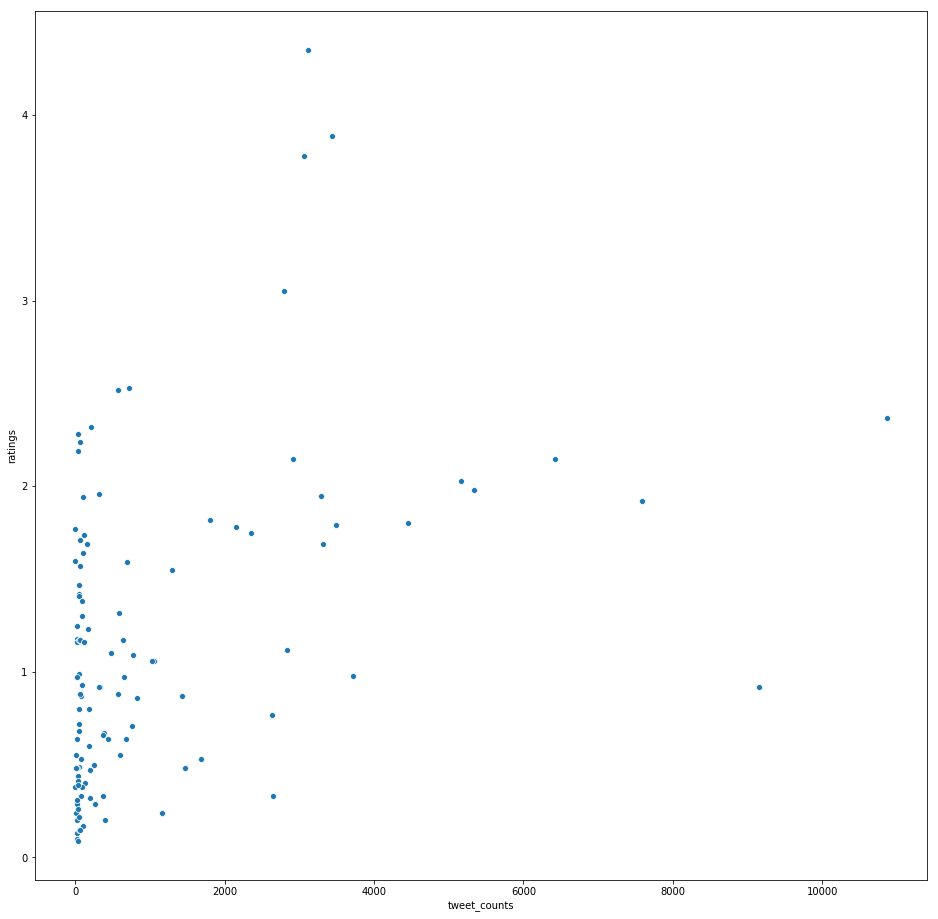

In [82]:
fig,ax=plt.subplots(figsize=(16,16))
sns.scatterplot(x='tweet_counts',y='ratings',data=per_week,ax=ax)